<a href="https://colab.research.google.com/github/OMGarad/CS-F429-NLP-Group_Project/blob/main/NLP_Part2_Omkars_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys


In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

assignment_dump.json  drive/  sample_data/


In [ ]:
%cd drive/MyDrive/Colab/

/content/drive/MyDrive/Colab


In [ ]:
dataset = pd.read_json("assignment_dump.json", orient='columns')

In [ ]:
df = dataset[:1000]

In [ ]:
df.head(10)

,abstract,authors,n_citation,references,title,venue,year,id
0,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002,00bcf2d5-1592-46b0-81fd-933f90b5ecca
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,,1991,00c85316-bddf-4bcb-93f5-097adadd73c2
4,This paper focuses on knowledge engineering fo...,"[Efthymios Alepis, Maria Virvou, Katerina Kaba...",50,"[522bea13-bd45-4918-9478-e87ae2f039f7, 60507d4...",Knowledge Engineering for Affective Bi-Modal I...,joint conference on knowledge-based software e...,2008,00dd5ece-1339-4cb6-a08e-43742ae2dac6
5,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,,2013,00e3940b-201b-40ba-bd20-dbdaf26ad324
6,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",50,"[0abc9de7-e047-44fc-998d-4bf02b9bc9ab, 2c9ebc3...",Leveraging legacy code to deploy desktop appli...,operating systems design and implementation,2008,010d4ce9-0279-4166-ae73-14551ded6404
7,"In recent years, most of mobile phones have a ...","[Hiroshi Furukawa, Yutaka Nakamura]",7,"[b2f0e0d3-0071-4076-921e-f93f30160c1c, f030524...",A pedestrian navigation method for user's safe...,international conference on human computer int...,2013,010d9907-45ef-459a-a293-8e1f41cef2b7
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",50,"[00515e82-3da6-497a-83d3-459e93247123, 0cd820e...",Word pairs in language modeling for informatio...,,2004,012b88ae-a763-45d6-8f19-2ec9ff739d5f
9,NaN,"[Prudence W. H. Wong, Fencol C. C. Yung, Mihai...",6,"[08784bb3-09b9-4bd2-a191-2606f3b3a8b8, 16bf10e...",An 8/3 Lower Bound for Online Dynamic Bin Packing,international symposium on algorithms and comp...,2012,01546472-0ac9-47fa-acca-ffcb7fc99097


In [ ]:
print(len(df))

1000


In [ ]:
for row in df:
  print(row)

abstract
authors
n_citation
references
title
venue
year
id


In [ ]:
id_dict = pd.Series(dataset.references.values,index=dataset.id).to_dict()

In [ ]:
for key in id_dict:
  print(id_dict[key])

Streaming output truncated to the last 5000 lines.
['2f25c3b0-14a0-4e82-bc8b-f6610eca349f', '35653175-e262-47b5-9927-8f22b8cb9844', '47c9336f-9b26-409b-8630-d4d835d9ec79', '4b21a6d1-b450-4837-b7b0-3cb1a2a8a113', '580aae2b-8be3-45ac-8397-881fc0db5da0', '85d0e3f4-fa91-492d-ab30-8c719f54da19', 'a9964812-7cbb-4025-8191-9c78e63353fa', 'd28aecc2-59fd-4cee-aa24-ae782f703f64', 'd2c6df0f-9495-442a-b323-44eb13273509', 'd304b9fb-e7a7-4bb4-8c9d-1967600730a6', 'f66a7880-c8ff-453e-8d51-858c9a904a47']
['44f7673f-43b7-453a-93f6-725d5aa2c966']
['3fd57973-0e76-450b-989d-b1b27194094c']
['0ff7c995-1ad2-4b55-9a38-ab8a1192313c', '15368709-ebec-441f-91d3-8a33eb0b11c5', '2df84544-b469-482a-b550-39c29e5627ee', '31e808ed-2aee-44b1-a9bc-bf2f232d6cc5', '48023323-da12-44f2-b34e-1d615a5f6957', '5dcd5949-faa9-4af3-8c6f-b285dd3b6566', 'b73280d5-1e86-4fd4-86fb-2b7b670d7eb4', 'e9939b8b-6fcb-4ded-ac64-43c7fdfb52d6']
['56edad61-6eac-47b9-8656-cd2d7afd77f4', '845557aa-8760-4e84-8bc9-89e228488d99', '87669516-feb2-4945-b193

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['004e1943-10c9-49c8-b583-a9baa466484d', '035a5372-d01a-445b-b369-764fbb9c6ed5', '047c0975-707b-406f-bc83-2e4d296253e5', '1ecfeeab-dd25-4274-be33-e8088892d46f', '1f888273-dfc7-4d2a-9e9c-ad8c2f91bfb0', '442895c4-93e2-4dea-afb7-4be44eaded41', '45844786-21d5-4c3b-b1a6-494fbcc3cbe4', '4bf1a187-f4d6-4bfe-bade-313420be7a21', '5fb4d6b2-84e6-4ed7-8425-816e61f0114a', '66672e2f-4fd0-4991-ac73-95a22ea1a138', '981ef2bf-7bc7-485d-a646-5b789b6a0928', '98df207d-2dfc-4365-846a-c875a2a3a59e', 'a900c9b0-7f6c-4c15-a7ed-5fa2f025951e', 'ae52038c-ab86-4d0e-988e-60899cc644e6', 'ae94bad5-ee03-4ba2-8306-229d7e9daacd', 'b4d60f41-4941-48cd-9b48-9c4aed5dc161', 'b608af66-6368-44dc-a670-2a3e42561ee1', 'c3636276-6a79-4c3b-afc6-7a1ea1fc256d', 'c79fa5f7-bd43-4fb6-97cc-e1c56e044062', 'ca62fdc7-a05a-41c0-ac66-4923a950b09d', 'cbbef4d0-eea6-45b9-b939-3bfc19d768ba', 'dd8087bb-bde1-4b8e-8ef0-3f8d0aabce9b', 'df1dd0d9-72bb-4059-9739-887bd7edd156', 'fb662970-842c-4615-beff-7808d0387278']
['9cf78907-bf80-49bd-96c3-fdf5f91383ee

In [ ]:
for key in id_dict:
  for value in id_dict[key]:
    if value not in id_dict:
      id_dict[key].remove(value)

In [ ]:
for key in id_dict:
  print(id_dict[key])

Streaming output truncated to the last 5000 lines.
['0af6d84d-ce69-4714-a27d-f0f29282f7aa', '1a4b7dd6-c11f-4fd1-9454-aeb6f3420d2a', '32c3099c-348a-4961-a524-d41659f6bd92', '6cece588-92ae-4a25-b967-9331c055b412', '7d27382e-6135-4158-a86f-31acdedf058d', '9b19a579-dc25-4dc8-8139-fd9f264983ac', 'b2e59e53-34c3-401a-8aaf-097b18c5f077', 'b34cd2f2-e19e-4321-8df7-1fe2e4a848bd', 'c4aa7916-9cad-4601-94c8-4efbd1e2a75a', 'cf19e6ea-660a-4a4e-b84d-77c10555ee54', 'daf4b91d-892e-4304-b8ff-5b00e2a50ded']
['aa245640-9df7-408d-b15d-32433447d7b5']
['1513de02-fa51-4ae3-9292-49acbc4c9506', '5f402b2c-2e4a-46d5-855a-5542ab5f9cca', '9152db9b-6e40-47ef-bff0-261f06ba0a6b', 'a5921f5e-0ce4-4ceb-b1be-717989fa93b3']
['9f1c57c9-ae6c-4e00-b3ee-10256adb3cb1']
['33481d56-f55e-4748-8743-88a3ccccbd5a', '6a404bbd-08bf-4d67-8d9c-b323503901bd', '78de7817-59e3-4c9b-9a8e-e79388a86740', 'aa44dd48-8e1b-4c0e-b79e-95e3bf683345', 'eb73c0ec-b374-4a1f-8dac-60f65b038251']
[]
['5c38a2f6-465d-4710-8eaf-4e4f9c64717a', '62e0b5d7-c968-4c08-

10000


In [ ]:
edges = [(a, b) for a, bs in id_dict.items() for b in bs]

df1 = pd.DataFrame(edges)

adj_matrix = pd.crosstab(df1[1], df1[1])

In [ ]:
pd.set_option('max_rows',100)
pd.set_option('max_colwidth',100)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 100]


In [ ]:
print(edges)

[('001c58d3-26ad-46b3-ab3a-c1e557d16821', '3133714c-f979-4d84-9224-97361cf053ab'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', 'b678b546-e867-4a57-8963-c5545b04f32d'), ('001c58d3-26ad-46b3-ab3a-c1e557d16821', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d'), ('001c8744-73c4-4b04-9364-22d31a10dbf1', 'a083a1b9-8dfb-45d6-99a9-fa30c4a6e9f5'), ('00c85316-bddf-4bcb-93f5-097adadd73c2', '7bb71afa-91b8-46e7-9008-da84e0427b93'), ('00c85316-bddf-4bcb-93f5-097adadd73c2', '9a4984f9-27d4-47eb-8bc8-0469bf540f94'), ('00dd5ece-1339-4cb6-a08e-43742ae2dac6', '60507d41-633f-4a9d-8265-b66b895a6af2'), ('00dd5ece-1339-4cb6-a08e-43742ae2dac6', 'ce3efb6d-06c0-44ba-9b5b-1c03c5ee39d5'), ('00e3940b-201b-40ba-bd20-dbdaf26ad324', '14cd3cf4-7086-4387-8b96-8f64359ac38e'), ('00e3940b-201b

In [ ]:
print(adj_matrix)

1                                     01253a71-0b02-48d3-ad57-70c45f10cc81  ...  fff742e8-a969-4e3e-87a5-1b7c3bb37aa7
1                                                                           ...                                      
01253a71-0b02-48d3-ad57-70c45f10cc81                                     1  ...                                     0
01d0b8a2-cd17-4455-a3fb-46ac6d221686                                     0  ...                                     0
02ed122f-8651-4ac7-8d48-2700c3f66168                                     0  ...                                     0
02f9e6a6-2ab5-4c4b-9398-1f14ea057fe5                                     0  ...                                     0
02ff8bb0-383f-46f9-87b1-2ab5221447b8                                     0  ...                                     0
...                                                                    ...  ...                                   ...
ffc44518-aeec-49bd-88cc-dbd72d3f94f4                    

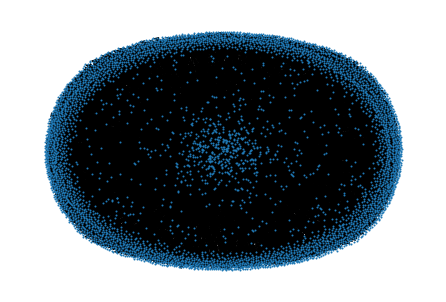

<Figure size 28800x28800 with 0 Axes>

In [ ]:
g = nx.DiGraph(edges)
nx.draw(g,with_labels=False,node_size=1)
plt.figure(figsize =(400, 400))
plt.draw()
plt.show()

In [ ]:
!pip install pyLDAvis
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 1.7 MB 12.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 37.5 MB/s 
     |████████████████████████████████| 11.3 MB 70.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=2982b3eb5b1a3999dd9f34b92f59eacc96e668c82537b6094f6b184363d454c0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.parsing.porter import PorterStemmer
import pyLDAvis
import pyLDAvis.gensim_models
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import string
from pprint import pprint
import warnings
import spacy
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa


In [ ]:
dataset["abstract"]=dataset["abstract"].fillna("")
dataset["title"]=dataset["title"].fillna("")
dataset["venue"]=dataset["venue"].fillna("")
dst1=dataset["abstract"].tolist()
dst2=dataset["title"].tolist()
dst3=dataset["venue"].tolist()
dst1=["{} ".format(ele) for ele in np.squeeze(dst1)]
dst2=["{} ".format(ele) for ele in np.squeeze(dst2)]
dst3=["{} ".format(ele) for ele in np.squeeze(dst3)]
dst=np.char.add(dst1, dst2)
dst=np.char.add(dst, dst3)

In [ ]:
print(dst[0:10])

["This paper describes the design and implementation of a methodology for the visualisation and hypothetical virtual reconstruction of Roman polychrome statuary for research purposes. The methodology is intended as an attempt to move beyond visualisations which are simply believable towards a more physically accurate approach. Accurate representations of polychrome statuary have great potential utility both as a means of illustrating existing interpretations and as a means of testing and revising developing hypotheses. The goal of this methodology is to propose a pipeline which incorporates a high degree of physical accuracy whilst also being practically applicable in a conventional archaeological research setting. The methodology is designed to allow the accurate visualisation of surviving objects and colourants as well as providing reliable methods for the hypothetical reconstruction of elements which no longer survive. The process proposed here is intended to limit the need for spec

In [ ]:
dtst=[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in dst]

In [ ]:
print(dtst[0:5])

[['paper', 'describes', 'design', 'implementation', 'methodology', 'visualisation', 'hypothetical', 'virtual', 'reconstruction', 'roman', 'polychrome', 'statuary', 'research', 'purposes', 'methodology', 'intended', 'attempt', 'move', 'beyond', 'visualisations', 'simply', 'believable', 'towards', 'physically', 'accurate', 'approach', 'accurate', 'representations', 'polychrome', 'statuary', 'great', 'potential', 'utility', 'means', 'illustrating', 'existing', 'interpretations', 'means', 'testing', 'revising', 'developing', 'hypotheses', 'goal', 'methodology', 'propose', 'pipeline', 'incorporates', 'high', 'degree', 'physical', 'accuracy', 'whilst', 'also', 'practically', 'applicable', 'conventional', 'archaeological', 'research', 'setting', 'methodology', 'designed', 'allow', 'accurate', 'visualisation', 'surviving', 'objects', 'colourants', 'well', 'providing', 'reliable', 'methods', 'hypothetical', 'reconstruction', 'elements', 'longer', 'survive', 'process', 'proposed', 'intended', 'l

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
dtst=lemmatization(dtst)

In [ ]:
print(dtst[0:2])

[['paper', 'describe', 'design', 'implementation', 'methodology', 'visualisation', 'hypothetical', 'virtual', 'reconstruction', 'research', 'purpose', 'methodology', 'intend', 'attempt', 'move', 'visualisation', 'simply', 'believable', 'physically', 'accurate', 'approach', 'accurate', 'representation', 'polychrome', 'statuary', 'great', 'potential', 'utility', 'mean', 'illustrate', 'exist', 'interpretation', 'mean', 'test', 'revise', 'develop', 'hypothesis', 'goal', 'methodology', 'propose', 'pipeline', 'incorporate', 'high', 'degree', 'physical', 'accuracy', 'also', 'practically', 'applicable', 'conventional', 'archaeological', 'research', 'set', 'methodology', 'design', 'allow', 'accurate', 'visualisation', 'surviving', 'object', 'colourant', 'well', 'provide', 'reliable', 'method', 'hypothetical', 'reconstruction', 'element', 'longer', 'survive', 'process', 'propose', 'intend', 'limit', 'need', 'specialist', 'recording', 'equipment', 'utilise', 'exist', 'datum', 'datum', 'collect', 

In [ ]:
print(len(dtst))

100000


In [ ]:
def calculate_jaccard(word_tokens1, word_tokens2):
# Combine both tokens to find union.
  both_tokens = word_tokens1 + word_tokens2
  union = set(both_tokens)

  # Calculate intersection.
  intersection = set()
  for w in word_tokens1:
    if w in word_tokens2:
      intersection.add(w)

  jaccard_score = len(intersection)/len(union)
  return jaccard_score

  for _ in range(len(df)):
    jaccard_score()

In [ ]:
score=[]

top_scores=[]

index=[]
ind = 0

for _ in range(len(dtst)):
  score.append(calculate_jaccard(dtst[0], dtst[_]))

for i in range(5):
  max = score[0]
  for j in range(len(score)):
    if max < score[j]:
      max = score[j]
      ind = j

  
  top_scores.append(score[ind])

  index.append(ind)
  score[ind] = 0

print(index)

[0, 76736, 28767, 82456, 91944]


In [ ]:
print(top_scores)

[1.0, 0.1292517006802721, 0.12903225806451613, 0.12837837837837837, 0.12686567164179105]


In [ ]:
paper_id =[]

for x in index:
 paper_id.append( dataset['id'].get(x) )

In [ ]:
print(paper_id)

['001c58d3-26ad-46b3-ab3a-c1e557d16821', '90f29e09-467d-41c5-8901-d890222bd928', 'd0df1a53-62f6-4a5c-9327-37810b25b981', '42d2ce4e-cc41-4969-add1-27941f73036e', '0b2a6255-a0cb-44b6-8ecb-882d6a448ddd']


In [ ]:
for key in paper_id:
  if(id_dict[key]):
    print(id_dict[key])

001c58d3-26ad-46b3-ab3a-c1e557d16821
['3133714c-f979-4d84-9224-97361cf053ab', '52f480e8-85e6-4c01-9e5b-d75eabf6a8ec', '8bd964d6-c45f-448c-9e65-efe5f98ca0a0', '9bfa8c24-8fb6-44d9-ba42-38b22f9cf34b', 'b678b546-e867-4a57-8963-c5545b04f32d', 'f0dccb0c-c17a-4fcb-a89f-fe4bdfa3356d']
90f29e09-467d-41c5-8901-d890222bd928


KeyError: ignored